In [96]:
from functools import cache
import random
from numpy import mean
import matplotlib.pyplot as plt

# Refs
* https://old.reddit.com/r/neptunespride/comments/2h8i5x/does_anyone_know_where_to_find_the_equations_for/
* https://neptunespride2.fandom.com/wiki/Triton:Research#Terraforming

In [38]:
@cache
def resource_level(init_resources, terraforming_level):
    return init_resources + 5 * terraforming_level

@cache
def base_price(resources, level):
    return 500 / resources * level

@cache
def econ_price(resources, level):
    return 2 * base_price(resources, level)

@cache
def science_price(resources, level):
    return 8 * base_price(resources, level)



class Star:
    def __init__(self, init_resources):
        self.init_resources = init_resources
        self.econ = 1
        self.science = 0
    
    
    def econ_upgrade_price(self, terraforming):
        return resource_level(terraforming)
    


# Asymptotic impact of inital star distribution on income

In [122]:
star_min = 1
start_max = 50
n_stars = 1000

rand_stars = [random.randint(1, 51) for i in range(n_stars)]
star_mean = mean(rand_stars)
av_stars = [star_mean for i in range(n_stars)]

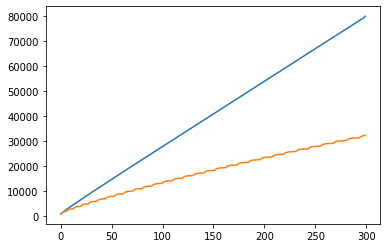

In [129]:
class Stars:
    def __init__(self, stars):
        stars = sorted(stars)[::-1]
        self.stars = stars
        self.n_stars = len(self.stars)
        self.econ_level = [1] * self.n_stars
        self.cheapest_star = 0
        self.econ_prices = [econ_price(self.stars[i], self.econ_level[i]) for i in range(self.n_stars)]
    
    def total_income(self):
        return 10 * sum(self.econ_level)
    
    def upgrade_econ(self, total_spending):
        while total_spending >= self.econ_prices[self.cheapest_star]:
            total_spending -= self.econ_prices[self.cheapest_star]
            self.econ_level[self.cheapest_star] += 1
            self.update_econ_price(self.cheapest_star)
            self.update_cheapest_star()
        return total_spending
    
    def update_econ_price(self, star):
        self.econ_prices[star] = econ_price(self.stars[star], self.econ_level[star])
    
    def update_cheapest_star(self):
        next_star = (self.cheapest_star + 1) % self.n_stars
        if self.econ_prices[self.cheapest_star] > self.econ_prices[next_star]:
            self.cheapest_star = next_star
    
def run_sim(stars, sim_duration):
    star_system = Stars(stars)
    treasury = 0
    total_econ = [0] * sim_duration
    for day in range(sim_duration):
        total_econ[day] = sum(star_system.econ_level)
        treasury += star_system.total_income()
        treasury = star_system.upgrade_econ(treasury)
    total_econ[-1] = sum(star_system.econ_level)
    return star_system, total_econ
            
        
sim_duration = 300
av_system, av_total_econ = run_sim(av_stars, sim_duration)
rand_system, rand_total_econ = run_sim(rand_stars, sim_duration)

sim_day = list(range(sim_duration))
plt.plot(sim_day, av_total_econ)
plt.plot(sim_day, rand_total_econ)

Uniform star systems systematically outperform the randomized star system in the terraform = 0 case. However, the randomized system is asymptotically linear.

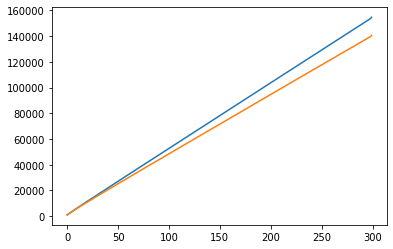

In [130]:
terra_level = 5
av_system, av_total_econ = run_sim([s + 5 * terra_level for s in av_stars], sim_duration)
rand_system, rand_total_econ = run_sim([s + 5 * terra_level for s in rand_stars], sim_duration)

sim_day = list(range(sim_duration))
plt.plot(sim_day, av_total_econ)
plt.plot(sim_day, rand_total_econ)

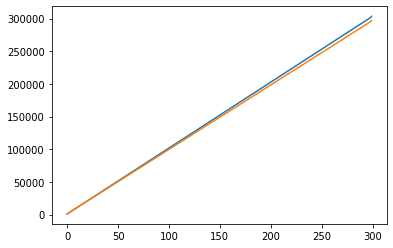

In [131]:
terra_level = 15
av_system, av_total_econ = run_sim([s + 5 * terra_level for s in av_stars], sim_duration)
rand_system, rand_total_econ = run_sim([s + 5 * terra_level for s in rand_stars], sim_duration)

sim_day = list(range(sim_duration))
plt.plot(sim_day, av_total_econ)
plt.plot(sim_day, rand_total_econ)

Terraforming has the effect of normalizing across stars, therefore as terraforming increases the discrepancy disappears. Can use the averaged star system as an approximation.

Is the average system equivalent to a single system on a different scale though?

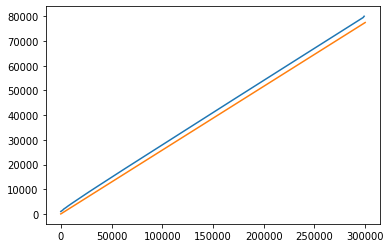

In [136]:
norm_factor = len(av_stars)
av_system, av_total_econ = run_sim(av_stars, sim_duration)
rand_system, rand_total_econ = run_sim([av_stars[0]], sim_duration * norm_factor)

sim_day = list(range(sim_duration))
plt.plot([norm_factor * i for i in sim_day], av_total_econ)
plt.plot(range(len(rand_total_econ)), rand_total_econ)

Basically, yes!

Now, what is the science optimal strategy?

# Science Optimal, single star

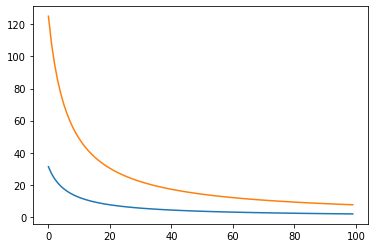

In [142]:
class Star:
    def __init__(self, init_resources):
        self.init_resources = init_resources
        self.terraforming = 1
        self.econ = 1
        self.science = 1
    
    @property
    def resource_level(self):
        return resource_level(self.init_resources, self.terraforming)
    
    @property
    def science_price(self):
        return 8 * base_price(self.resource_level, self.science)

    @property
    def econ_price(self):
        return 2 * base_price(self.resource_level, self.econ)

# Terminates at 100 weapons
def greedy(Star):
    # buys the cheapest every time
    day = 0
    for event in num_events:
        pass

star = Star(27)
econ_prices = [star.econ_price]
science_prices = [star.science_price]
for i in range(1, 100):
    star.terraforming += 1
    econ_prices.append(star.econ_price)
    science_prices.append(star.science_price)
plt.plot(econ_prices)
plt.plot(science_prices)
        

In [ ]:
tech_prices = 
def greedy